In [252]:
import random
import numpy as np
import pandas as pd

from scipy.stats import truncnorm


## Distribución categoría 

In [5]:
categories = [ 'A' , 'B' , 'C' ]
probs = [ .3 , .4 , .3 ] 

In [9]:
ejemplo = pd.DataFrame({
    "category": np.random.choice( categories , size=1000, p=probs )
})

In [13]:
ejemplo["n"] = 1

In [30]:
summ = ejemplo.groupby( ["category"] , as_index=False ).agg({
    "n": ["sum"]
})
summ.columns = ["category","sum"]

In [32]:
summ["prob"] = summ["sum"] / ejemplo.shape[0]

In [34]:
summ

,category,sum,prob
0,A,298,0.298
1,B,399,0.399
2,C,303,0.303


## Distribución Numerica

In [74]:
n = [ random.gauss( 10 , 0.4 ) for _ in range(1000) ]

In [76]:
numdf = pd.DataFrame({
    "n": n 
})

In [78]:
numdf.describe()

,n
count,1000.000000
mean,9.980941
std,0.407013
min,8.795651
25%,9.701293
50%,9.992359
75%,10.247311
max,11.072471


array([[<Axes: title={'center': 'n'}>]], dtype=object)

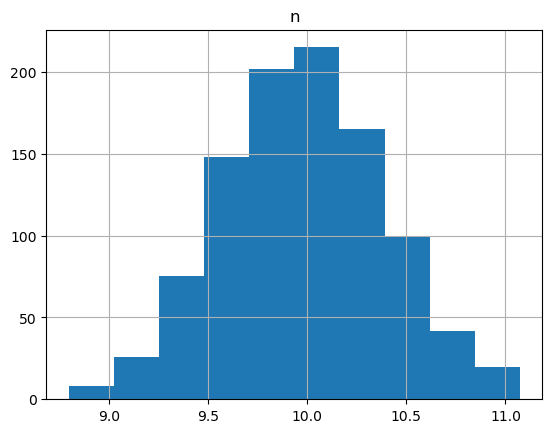

In [80]:
numdf.hist()

## Distribución exponencial

In [215]:
n = [ random.expovariate(9) for _ in range(1000) ]

In [217]:
n.append( -10 )
n.append( -11 )
n.append( -12 )
n.append( -13 )


In [219]:
n[ 995: ]

[0.3522245315028349,
 0.3695853152224663,
 0.2300557183785872,
 0.06643310714154113,
 0.13781148668355364,
 -10,
 -11,
 -12,
 -13]

In [221]:
numdf = pd.DataFrame({ "n": n })

In [223]:
numdf.describe()

,n
count,1004.000000
mean,0.066990
std,0.743924
min,-13.000000
25%,0.031101
50%,0.078594
75%,0.158019
max,0.749010


array([[<Axes: title={'center': 'n'}>]], dtype=object)

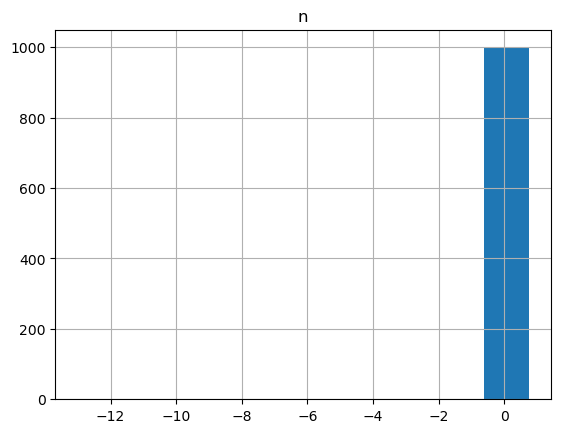

In [225]:
numdf.hist()

<Axes: >

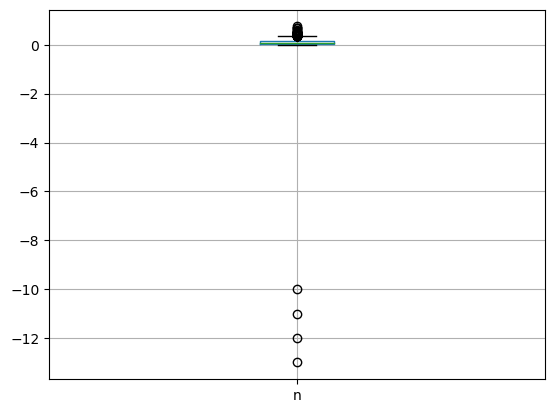

In [227]:
numdf.boxplot()

In [229]:
coll = pd.Series( numdf["n"].tolist() )

In [231]:
Q1 = coll.quantile(.25)
Q3 = coll.quantile(.75)

IQR = Q3 - Q1

In [233]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [235]:
lower_bound

-0.15927697332757082

In [237]:
upper_bound

0.34839689811307484

In [239]:
numdf["atypical"] = 0

In [241]:
numdf.loc[ 
    (numdf["n"] > upper_bound) 
    | (numdf["n"] < lower_bound) 
, ["atypical"] ] = 1

In [243]:
numdf.loc[ numdf["atypical"] == 1 , : ]

,n,atypical
22,0.434122,1
33,0.361584,1
35,0.700466,1
39,0.377126,1
47,0.480378,1
49,0.431981,1
50,0.543727,1
58,0.404316,1
65,0.348911,1
79,0.474042,1


array([[<Axes: title={'center': 'n'}>]], dtype=object)

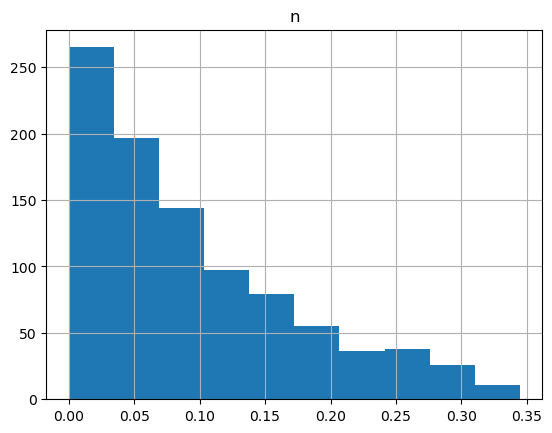

In [247]:
numdf.loc[ numdf["atypical"] == 0 , ["n"] ].hist()

<Axes: >

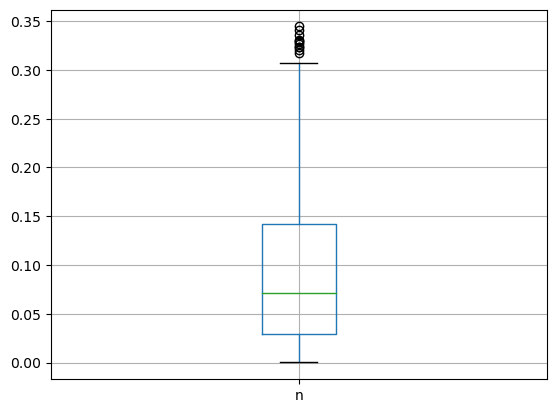

In [249]:
numdf.loc[ numdf["atypical"] == 0 , ["n"] ].boxplot()

## Distribuciones truncadas 

In [264]:

# Parámetros de la distribución
min_val = 40       # Valor mínimo
max_val = 100       # Valor máximo
media = 80         # Media deseada
desv_std = 4      # Desviación estándar deseada

# Calcular los límites 'a' y 'b' para la función truncnorm
a, b = (min_val - media) / desv_std, (max_val - media) / desv_std

# Generar muestras de la distribución normal truncada
muestras = truncnorm.rvs(a, b, loc=media, scale=desv_std, size=1000)

# Mostrar estadísticas de las muestras generadas
print("Media de las muestras:", np.mean(muestras))
print("Desviación estándar de las muestras:", np.std(muestras))
print("Valor mínimo de las muestras:", np.min(muestras))
print("Valor máximo de las muestras:", np.max(muestras))

Media de las muestras: 79.88137297149099
Desviación estándar de las muestras: 4.043237176248513
Valor mínimo de las muestras: 66.94433229325577
Valor máximo de las muestras: 93.3122996944457


In [266]:
numdf = pd.DataFrame({"n": muestras})

In [268]:
numdf.describe()

,n
count,1000.000000
mean,79.881373
std,4.045260
min,66.944332
25%,77.202031
50%,79.823485
75%,82.602573
max,93.312300


array([[<Axes: title={'center': 'n'}>]], dtype=object)

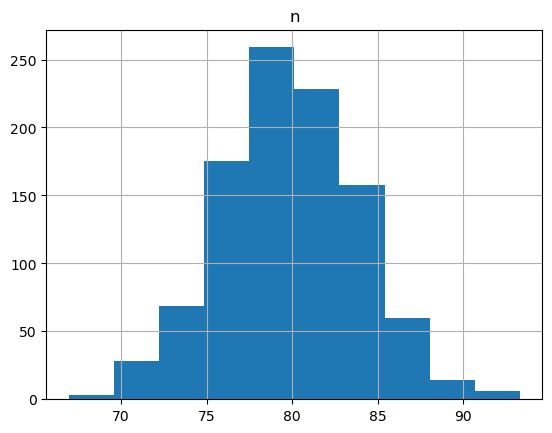

In [270]:
numdf.hist()